http://archive.ics.uci.edu/ml/datasets/Student+Performance#

### All needed imports

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 80

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC # SVM model with kernels
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

### Loading and Exploring Data

There are two files of students performance in two subjects: math and portugues (Portugal is the country the dataset is from). Important notice : description (later on, as DESCR) tells that "there are several (382) students that belong to both datasets", so since data set about portugues is twice larger than about math lessons, I will be taking former.

In [2]:
student_por = pd.read_csv('student/student-por.csv', sep = ';')
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
# check missing values in variables

student_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
student_por.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [6]:
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

#### I know from DESCR, that *G1* and *G2* are grades for midterm exams, so they are a consequence of the last exam and they correlate a great deal with our target variable *G3*, so  I won't be making another column of average value for these three

In [7]:
student_por.tail(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
634,MS,F,18,U,GT3,T,3,3,other,other,...,4,1,3,1,2,1,1,16,16,16
635,MS,F,17,R,GT3,T,3,1,at_home,other,...,4,5,4,2,3,1,10,8,9,9
636,MS,M,18,U,GT3,T,4,4,teacher,teacher,...,3,2,4,1,4,2,4,17,18,19
637,MS,M,18,R,GT3,T,2,1,other,other,...,4,4,3,1,3,5,0,7,7,0
638,MS,M,17,U,GT3,T,2,3,other,services,...,4,4,3,1,1,3,4,14,15,16
639,MS,M,19,R,GT3,T,1,1,other,services,...,4,3,2,1,3,5,0,5,8,0
640,MS,M,18,R,GT3,T,4,2,other,other,...,5,4,3,4,3,3,0,7,7,0
641,MS,F,18,R,GT3,T,2,2,at_home,other,...,5,3,3,1,3,4,0,14,17,15
642,MS,F,17,U,GT3,T,4,3,teacher,other,...,5,5,4,1,1,1,0,6,9,11
643,MS,F,18,R,GT3,T,4,4,teacher,at_home,...,4,4,3,2,2,5,4,7,9,10


#### After inspecting the dataset description I'm curious how *health* and *absences* values corelate. Perhaps, I could made one feature out of them. But before looking for correlation we should normalize these features, cause their ranges differ very much.

#### Since I have not found a descent Mean normalization function that would suit me, I am gonna build one myself, using formula: <br>  xi = (xi - mean)/(max-min).  Values *mean, max_min* where taken from *.describe()* method. 

### UPD: MinMaxScaler is what I needed

<p>For the sake of God I'll make a copy for such playground</p>

### UPD: normalizing values didn't help. Seems that normaliying or not, nothing changes... I should look it up. Nonetheless, I leave the code in one cell below just as a rminder to myself

In [8]:
copied = student_por.copy()

mean = 5.7
max_min = 75

def mean_normalization(x):
    return((x-mean)/max_min)

copied['absences'] = copied['absences'].apply(mean_normalization)
copied['health'] = copied['health'].apply(mean_normalization)

corr_matrix = copied.corr()

corr_matrix["absences"].sort_values(ascending=False)

absences      1.000000
Dalc          0.172952
Walc          0.156373
age           0.149998
failures      0.122779
goout         0.085374
Fedu          0.029859
traveltime   -0.008149
Medu         -0.008577
freetime     -0.018716
health       -0.030235
famrel       -0.089534
G3           -0.091379
studytime    -0.118389
G2           -0.124745
G1           -0.147149
Name: absences, dtype: float64

In [9]:
corr_matrix = student_por.corr()

corr_matrix["absences"].sort_values(ascending=False)

absences      1.000000
Dalc          0.172952
Walc          0.156373
age           0.149998
failures      0.122779
goout         0.085374
Fedu          0.029859
traveltime   -0.008149
Medu         -0.008577
freetime     -0.018716
health       -0.030235
famrel       -0.089534
G3           -0.091379
studytime    -0.118389
G2           -0.124745
G1           -0.147149
Name: absences, dtype: float64

### A little bit about correlation. 

<p>Since the dataset is not too large we can easily compute standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the *corr()* method.
    
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; when the coefficient is close to –1, it means that there is a strong negative correlation.Finally, coefficients close to 0 mean that there is no linear correlation. </p>

<p>The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to 0, then y generally goes up”)</p>

#### Let’s look at how much each *numerical* attributes correlates with *G3* value:

In [10]:
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

#### Apparently, *G3* has correlation not only with *G1* and *G2* but also with *studytime*, *failures*, *Dalc*, *Walc*, *traveltime*, *freetime*, *age*, *Medu* (mother's education) and *Fedu* (father's education)

#### Another way to check for correlation between attributes is to use the pandas *scatter_matrix()* function, which plots every numerical attribute against every other numerical attribute. Since there are 16 numerical attributes, we would get 16x16 = 256 plots, which would not fit on a page—so let’s just focus on a few promising attributes that seem most correlated with *G3*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fadaf1c2f90>,
      dtype=object)

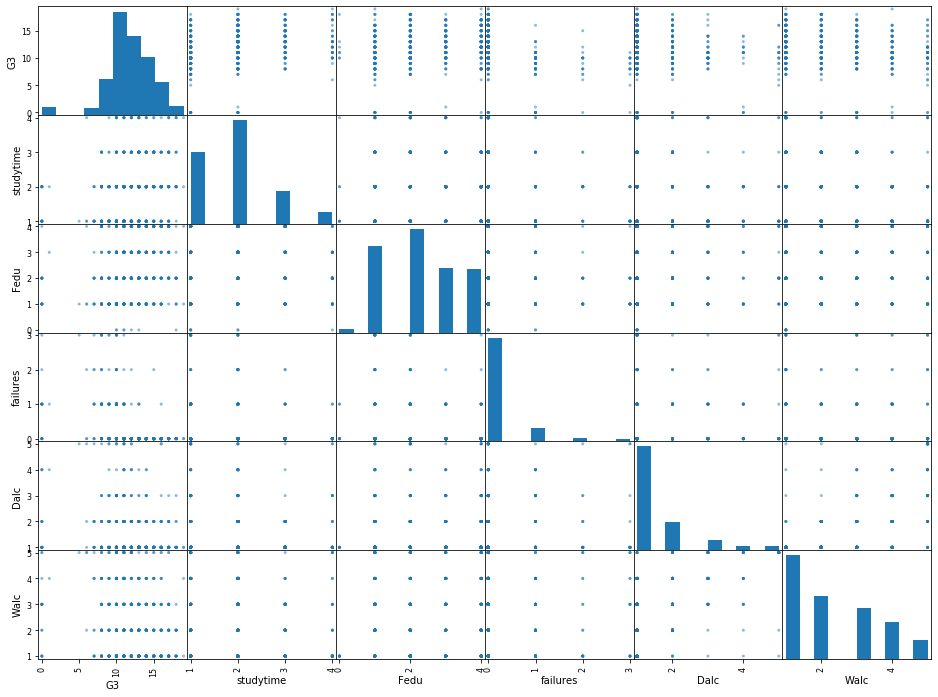

In [11]:
from pandas.plotting import scatter_matrix

# I don't take G2 and G1 into account, because they are an obvious choice
attributes = ["G3", "studytime", "Fedu", "failures", "Dalc", "Walc"] 

scatter_matrix(student_por[attributes], figsize=(16, 12))

## Choosing features. The goal is to predict *G3*

#### And yet another way to check numeric data for correlations

Text(0.5, 1, 'Correlation Heatmap')

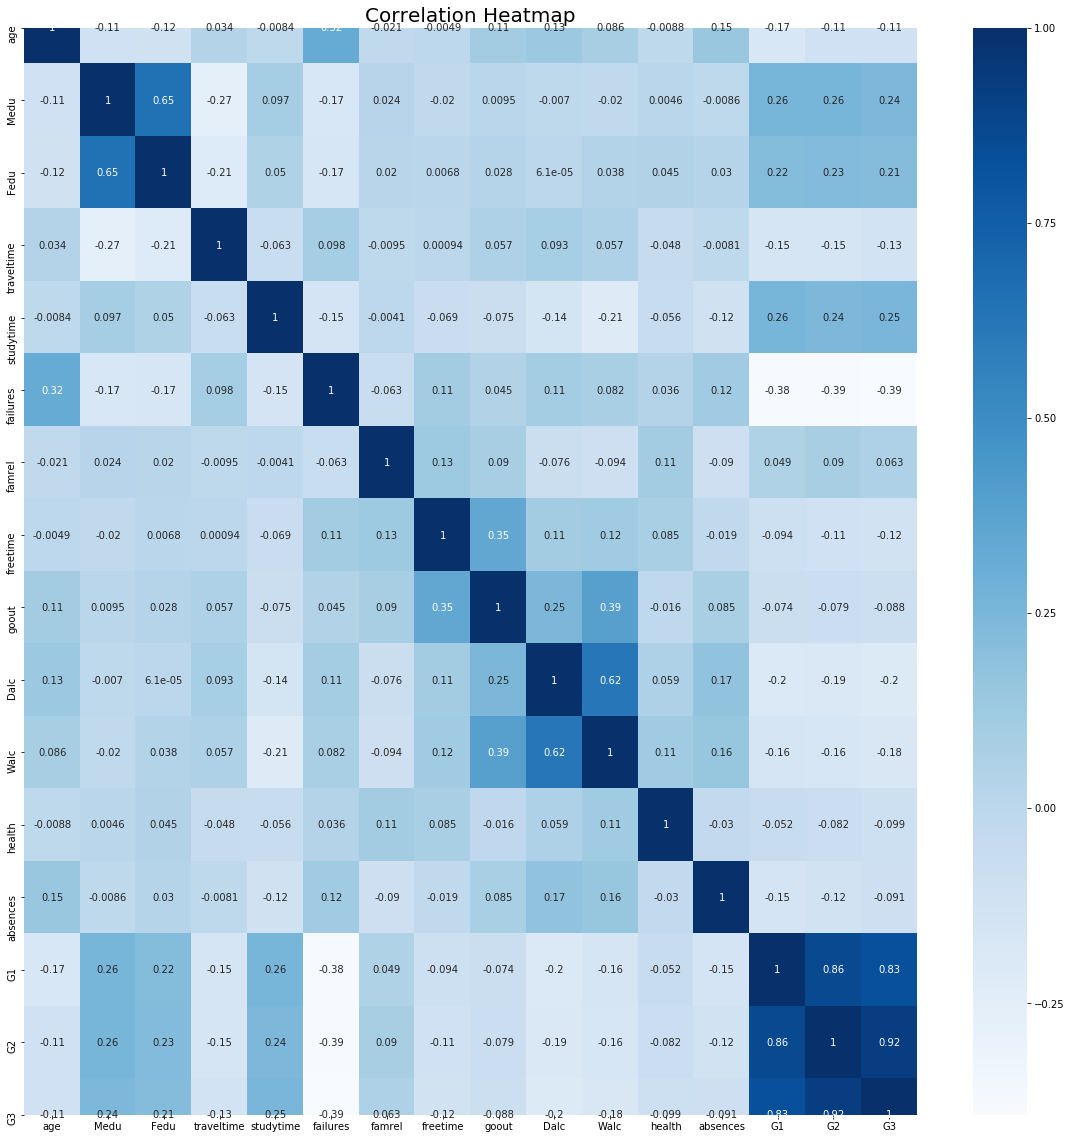

In [12]:
import seaborn as sns

corr_matrix = student_por.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title('Correlation Heatmap', fontsize=20)

#### Judging by this heatmap and also by previous correlations matrices, *studytime, failures, Dalc, Walc, traveltime, freetime, age, Medu and Fedu* might really have an impact on *G1-G3*

### Let's now analyze categorical variables

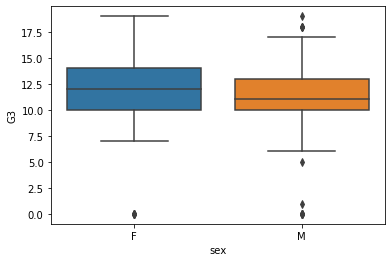

In [15]:
#comparing sex with G3
sns.boxplot(x="sex", y="G3", data=student_por)

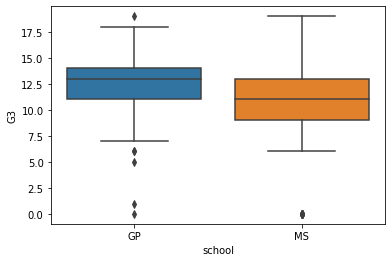

In [16]:
#comparing school with G3
sns.boxplot(x="school", y="G3", data=student_por)

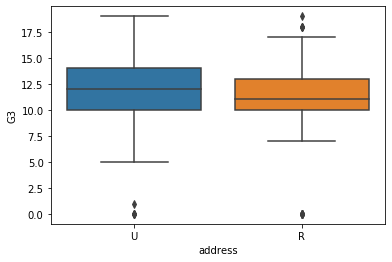

In [17]:
#comparing adress with G3
sns.boxplot(x="address", y="G3", data=student_por)

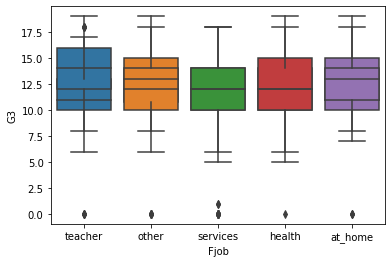

In [18]:
#comparing parent's jobs with G3
sns.boxplot(x="Mjob", y="G3", data=student_por)
sns.boxplot(x="Fjob", y="G3", data=student_por)

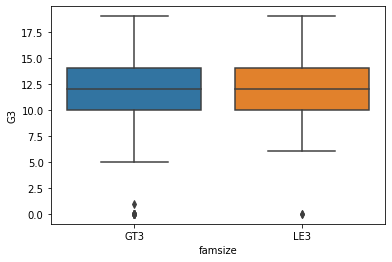

In [19]:
#comparing famsize with G3
sns.boxplot(x="famsize", y="G3", data=student_por)

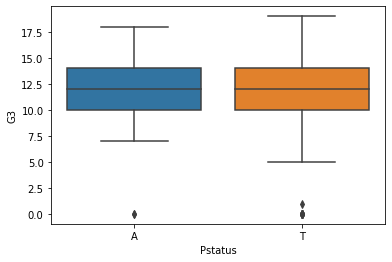

In [20]:
#comparing Pstatus with G3
sns.boxplot(x="Pstatus", y="G3", data=student_por)

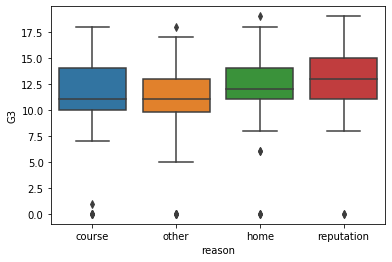

In [21]:
#comparing reason with G3
sns.boxplot(x="reason", y="G3", data=student_por)

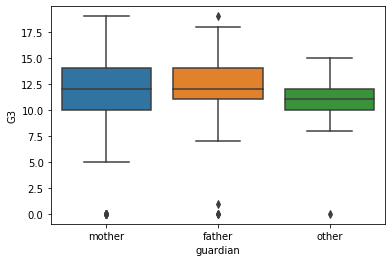

In [22]:
#comparing guardian with G3
sns.boxplot(x="guardian", y="G3", data=student_por)

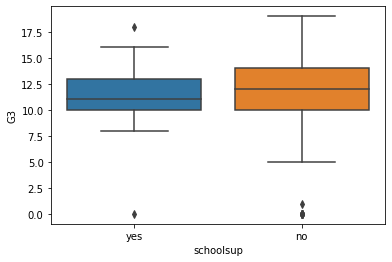

In [23]:
#comparing schoolsup with G3
sns.boxplot(x="schoolsup", y="G3", data=student_por)

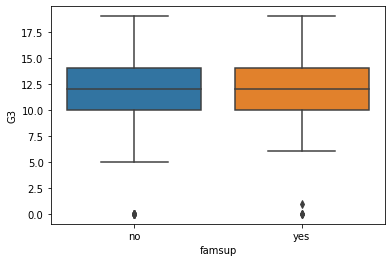

In [24]:
#comparing famsup with G3
sns.boxplot(x="famsup", y="G3", data=student_por)

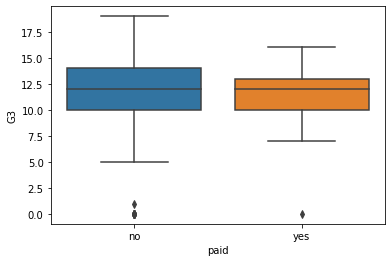

In [25]:
#comparing paid with G3
sns.boxplot(x="paid", y="G3", data=student_por)

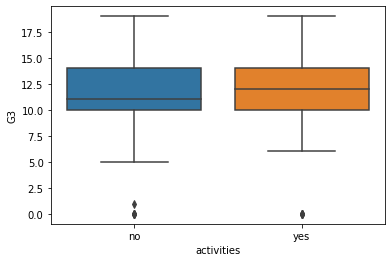

In [26]:
#comparing activities with G3
sns.boxplot(x="activities", y="G3", data=student_por)

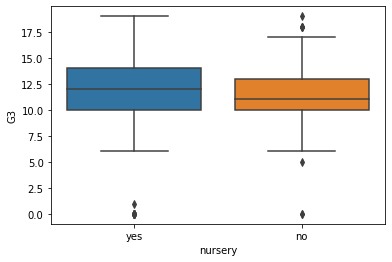

In [27]:
#comparing nursery with G3
sns.boxplot(x="nursery", y="G3", data=student_por)

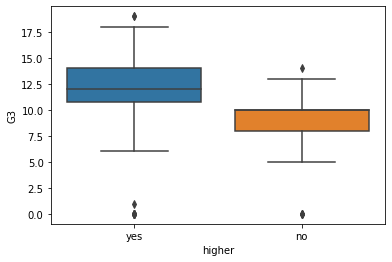

In [28]:
#comparing higher with G3
sns.boxplot(x="higher", y="G3", data=student_por)

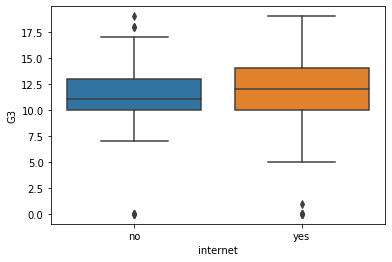

In [29]:
#comparing internet with G3
sns.boxplot(x="internet", y="G3", data=student_por)

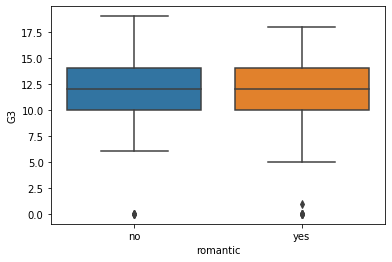

In [30]:
#comparing romantic with G3
sns.boxplot(x="romantic", y="G3", data=student_por)

### After examining boxplots, I've come to a conclusion that the following numerical and categorical features have an inpact on *G3* : 


<ul>
    <li>Numerical: studytime, failures, Dalc, Walc, traveltime, freetime, Medu and Fedu, G1, G2</li>
    <li>Categorical: Sex, School, Address, Mjob + FJob, Reason, Guardian, Schoolsup, Higher, Internet</li>
</ul>

<p>See dataset description for info about each feature </p>

In [13]:
# making dataframe I'm gonna work with + target G3

features_chosen = ['studytime', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime',  'Medu', 'Fedu', 
                   'sex', 'school', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                   'higher', 'internet', 'G1', 'G2', 'G3']

student_reduced = student_por[features_chosen].copy()

student_reduced

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,sex,school,...,Mjob,Fjob,reason,guardian,schoolsup,higher,internet,G1,G2,G3
0,2,0,1,1,2,3,4,4,F,GP,...,at_home,teacher,course,mother,yes,yes,no,0,11,11
1,2,0,1,1,1,3,1,1,F,GP,...,at_home,other,course,father,no,yes,yes,9,11,11
2,2,0,2,3,1,3,1,1,F,GP,...,at_home,other,other,mother,yes,yes,yes,12,13,12
3,3,0,1,1,1,2,4,2,F,GP,...,health,services,home,mother,no,yes,yes,14,14,14
4,2,0,1,2,1,3,3,3,F,GP,...,other,other,home,father,no,yes,no,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,1,1,2,1,4,2,3,F,MS,...,services,other,course,mother,no,yes,yes,10,11,10
645,2,0,1,1,1,3,3,1,F,MS,...,teacher,services,course,mother,no,yes,yes,15,15,16
646,2,0,1,1,2,1,1,1,F,MS,...,other,other,course,mother,no,yes,no,11,12,9
647,1,0,3,4,2,4,3,1,M,MS,...,services,services,course,mother,no,yes,yes,10,10,10


### I have given it a lot of thoughts and here is what I'm thinking.
#### The point of this notebook is to find *G3* , of course by selecting the best model and the best features for that. And we are visualizing, analysing these features, such as *traveltime* from home to school or possible drinking problems or romantic affairs, family statuses and so on and so on ... we are basically thinking of the things, that influence our grades. So, based on these thoughts, I am going to get rid off *G1* and *G2*, since these are grades for first and second halves of the year respectively. And they are, as much as *G3* reflections of the features choses. Instead of having three grades, I'm going to make one mean *G* out of them.

In [35]:
# mean
student_reduced["G"]=(student_reduced["G1"]+student_reduced["G2"]+student_reduced["G3"])/3

# dropping initial grades and leaving mean 
student_reduced.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

student_reduced.head()

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,sex,school,address,Mjob,Fjob,reason,guardian,schoolsup,higher,internet,G
0,2,0,1,1,2,3,4,4,F,GP,U,at_home,teacher,course,mother,yes,yes,no,7.333333
1,2,0,1,1,1,3,1,1,F,GP,U,at_home,other,course,father,no,yes,yes,10.333333
2,2,0,2,3,1,3,1,1,F,GP,U,at_home,other,other,mother,yes,yes,yes,12.333333
3,3,0,1,1,1,2,4,2,F,GP,U,health,services,home,mother,no,yes,yes,14.000000
4,2,0,1,2,1,3,3,3,F,GP,U,other,other,home,father,no,yes,no,12.333333


#### Another quick way to get a feel of the type of data we are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

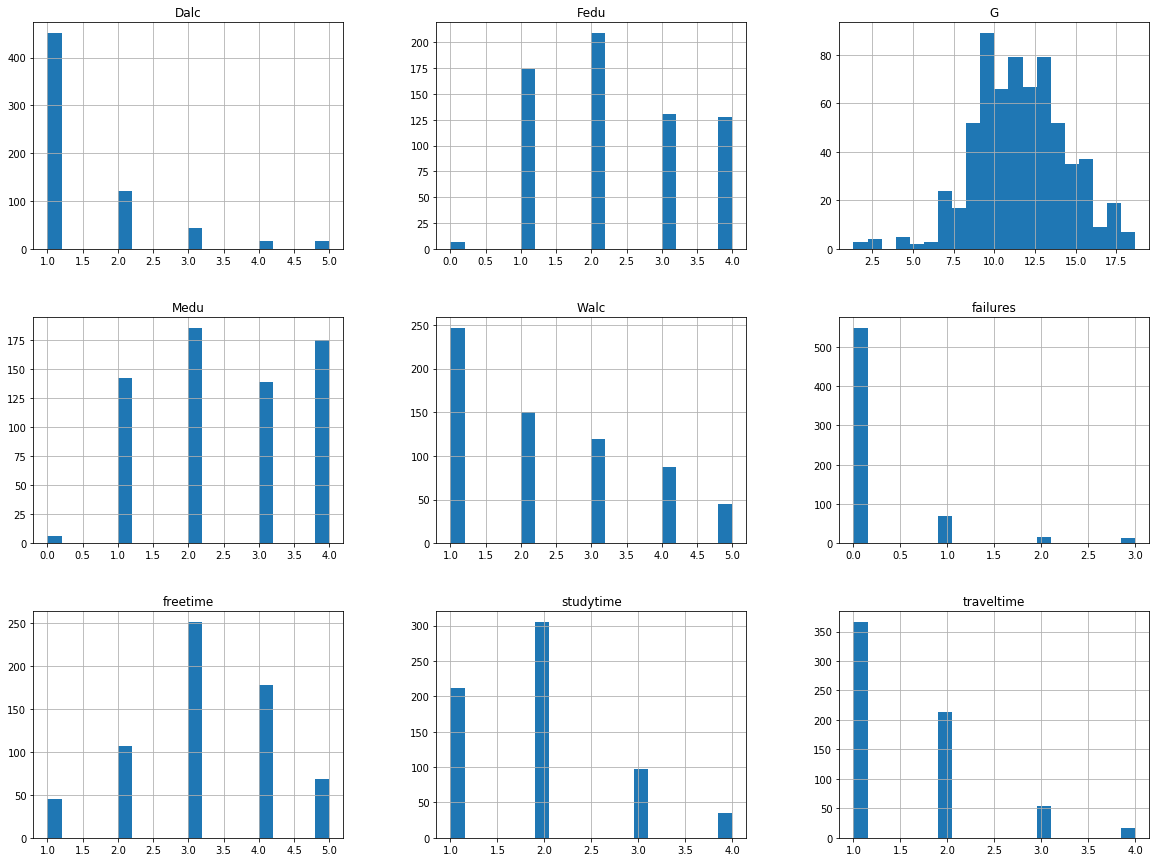

In [36]:
student_reduced.hist(bins=20, figsize=(20,15))
plt.show()

In [56]:
features_cat = ['sex','school','address','Mjob','Fjob','reason','schoolsup','guardian','higher','internet']

student_reduced_cat = pd.get_dummies(student_reduced, columns = features_cat)
student_reduced_cat

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,G,sex_F,...,reason_reputation,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,higher_no,higher_yes,internet_no,internet_yes
0,2,0,1,1,2,3,4,4,7.333333,1,...,0,0,1,0,1,0,0,1,1,0
1,2,0,1,1,1,3,1,1,10.333333,1,...,0,1,0,1,0,0,0,1,0,1
2,2,0,2,3,1,3,1,1,12.333333,1,...,0,0,1,0,1,0,0,1,0,1
3,3,0,1,1,1,2,4,2,14.000000,1,...,0,1,0,0,1,0,0,1,0,1
4,2,0,1,2,1,3,3,3,12.333333,1,...,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,1,1,2,1,4,2,3,10.333333,1,...,0,1,0,0,1,0,0,1,0,1
645,2,0,1,1,1,3,3,1,15.333333,1,...,0,1,0,0,1,0,0,1,0,1
646,2,0,1,1,2,1,1,1,10.666667,1,...,0,1,0,0,1,0,0,1,1,0
647,1,0,3,4,2,4,3,1,10.000000,0,...,0,1,0,0,1,0,0,1,0,1


In [57]:
student_reduced_cat.columns

Index(['studytime', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime',
       'Medu', 'Fedu', 'G', 'sex_F', 'sex_M', 'school_GP', 'school_MS',
       'address_R', 'address_U', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'schoolsup_no',
       'schoolsup_yes', 'guardian_father', 'guardian_mother', 'guardian_other',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes'],
      dtype='object')

#### Before looking at the data any further, I need to create a test set, put it aside, and never look at it. (c) Aurélien Geron

In [58]:
train_set, test_set = train_test_split(student_reduced_cat, test_size=0.2, random_state=42)

In [59]:
train_set.shape, test_set.shape

((519, 38), (130, 38))

### I guess we have a sufficient number of instances in dataset for each stratum, so no need in *Stratified sampling*

#### Now, we need to separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values 

In [60]:
X_train = train_set.drop("G", axis=1) 
y_train = train_set["G"].copy()

X_train.shape, y_train.shape

((519, 37), (519,))

In [61]:
X_test = test_set.drop("G", axis=1) 
y_test = test_set["G"].copy()

X_test.shape, y_test.shape

((130, 37), (130,))

#### Looking at the data we can see string-valued features. They are not arbitrary texts: these are a limited number of possible values, each of which represents a category. So these attributes are categorical attributes. Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class. And for numerical values I will use MinMaxScaler. These two function I will put in one pipeline.

<p>As far as I know, all but the last estimator must be transformers (i.e., they must have a fit_transform() method)</p>

<p>We could've also used <i>Onehot encoding</i> but since we have binary inputs, Ordinal will do fine .. I guess</p>

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

features_cat = ['sex','school','address','Mjob','Fjob','reason','schoolsup','guardian','higher','internet']

features_num = ['studytime', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime', 'Medu', 'Fedu']

full_pipeline = ColumnTransformer([

    ("num", StandardScaler(), features_num), 
    
    ("encoder", OneHotEncoder(), features_cat),
])

X_train_prepared = full_pipeline.fit_transform(X_train)

### Selectin and Training the Model

#### I'll try Linear Regression with regularization

In [64]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2") # specifying Ridge Regression

sgd_reg.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [88]:
accuracy=sgd_reg.score(X_test,y_test)  

In [89]:
accuracy

0.10450516115621478

### Accuracy of 0.1 is really bad. Perhaps the model badly overfits.

#### There are a few ways to find that out:
<ul>
    <li>Learning curves - these are plots of the model’s performance on the training set and the validation set as a function of the training set size </li>
    <li>Cross-validation - if a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting.</li>
</ul>

### Learning Curves

In [96]:
def plot_learning_curves(model, X, y):
    X_train_not_prep, X_val_not_prep, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    
    X_train = full_pipeline.fit_transform(X_train_not_prep)
    X_val = full_pipeline.fit_transform(X_val_not_prep)
    
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

#### Estimating SGDRegressor's geberalization performance

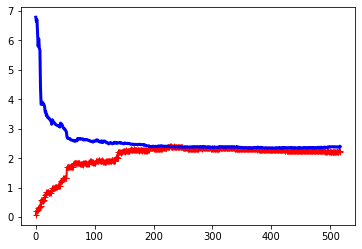

In [104]:
sgd_reg_curves = SGDRegressor(penalty='l2') 

X_curve = student_reduced.drop("G", axis=1) 
y_curve = student_reduced["G"].copy()
plot_learning_curves(sgd_reg_curves, X_curve, y_curve)

In [101]:
X_curve

,studytime,failures,Dalc,Walc,traveltime,freetime,Medu,Fedu,sex,school,address,Mjob,Fjob,reason,guardian,schoolsup,higher,internet
0,2,0,1,1,2,3,4,4,F,GP,U,at_home,teacher,course,mother,yes,yes,no
1,2,0,1,1,1,3,1,1,F,GP,U,at_home,other,course,father,no,yes,yes
2,2,0,2,3,1,3,1,1,F,GP,U,at_home,other,other,mother,yes,yes,yes
3,3,0,1,1,1,2,4,2,F,GP,U,health,services,home,mother,no,yes,yes
4,2,0,1,2,1,3,3,3,F,GP,U,other,other,home,father,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3,1,1,2,1,4,2,3,F,MS,R,services,other,course,mother,no,yes,yes
645,2,0,1,1,1,3,3,1,F,MS,U,teacher,services,course,mother,no,yes,yes
646,2,0,1,1,2,1,1,1,F,MS,U,other,other,course,mother,no,yes,no
647,1,0,3,4,2,4,3,1,M,MS,U,services,services,course,mother,no,yes,yes


### Better Evaluation Using Cross-Validation

####  Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root.

In [137]:
scores = cross_val_score(sgd_reg, X_train_prepared, y_train, scoring="neg_mean_squared_error", cv=10) 

sgd_reg_scores = np.sqrt(-scores)

In [138]:
sgd_reg_scores

array([1.1825377 , 1.2034989 , 1.68490437, 1.93231972, 1.59368176,
       0.99896572, 1.32727181, 0.92010972, 1.07035118, 0.83349994])

#### Let's look at the results

In [139]:
def display_scores(scores):
    print('Scores:', scores)
    print('Std.  :', scores.std())
    print('Mean  :', scores.mean())
    
display_scores(sgd_reg_scores)

Scores: [1.1825377  1.2034989  1.68490437 1.93231972 1.59368176 0.99896572
 1.32727181 0.92010972 1.07035118 0.83349994]
Std.  : 0.3401451997129983
Mean  : 1.274714081635046


In [140]:
print("Accuracy: %0.2f (+/- %0.2f)" % (sgd_reg_scores.mean(), sgd_reg_scores.std() * 2))

Accuracy: 1.27 (+/- 0.68)


#### Clearly an overfit. I either need more data, or decrease/scale features. Since I already scaled them, let's try to get rid of some features

In [154]:
features_cat = ['sex','school','address','Mjob','Fjob','reason','schoolsup','guardian','higher','internet']
features_num = ['studytime', 'failures', 'Dalc', 'Walc', 'traveltime', 'freetime', 'Medu', 'Fedu', 'G1', 'G2']

cat_encoder = OneHotEncoder()
X_cat_1hot = cat_encoder.fit_transform(X_train) 
X_cat_1hot

<519x98 sparse matrix of type '<class 'numpy.float64'>'
	with 10380 stored elements in Compressed Sparse Row format>

In [155]:
X_cat_1hot.toarray()

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

### That's bad ..

#### Let's look for correlations in the data

#### Let’s train a DecisionTreeRegressor. This is a powerful model, capable of finding complex nonlinear relationships in the data

In [128]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

#### Now that the model is trained, let’s evaluate it on the training set:

In [129]:
X_train_predictions = tree_reg.predict(X_prepared)

tree_mse = mean_squared_error(y_train, X_train_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.18623125657326026

#### That's better. We don’t want to touch the test set until you are ready to launch a model we are confident about, so we need to use part of the training set for training and part of it for model validation.

### Better Evaluation Using Cross-Validation

In [130]:
scores = cross_val_score(tree_reg, X_prepared, y_train, 
                         scoring="neg_mean_squared_error", cv=10) 

tree_rmse_scores = np.sqrt(-scores)

#### Let’s compute the same scores for the Linear Regression model just to be sure:

In [133]:
lin_scores = cross_val_score(lin_reg, X_prepared, y_train, 
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.08859608 2.48330298 3.26072287 2.82511586 3.15488989 2.33581363
 2.97942708 2.29404867 2.64378636 2.1123173 ]
Std.  : 0.38155247522436164
Mean  : 2.717802071288069


In [134]:
X_test_prepared.shape

(130, 22)

#### the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model. Let’s try one last model now: the RandomForestRegressor

In [135]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor()
forest_reg.fit(X_prepared, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [136]:
forest_scores = cross_val_score(lin_reg, X_prepared, y_train, 
                                scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3.08859608 2.48330298 3.26072287 2.82511586 3.15488989 2.33581363
 2.97942708 2.29404867 2.64378636 2.1123173 ]
Std.  : 0.38155247522436164
Mean  : 2.717802071288069


### Let's search for the best combination of hyperparameter values for the RandomForestRegressor with GridSearch:

In [137]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)

In [138]:
grid_search.fit(X_prepared, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [139]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [140]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

3.243820599704263 {'max_features': 2, 'n_estimators': 3}
2.8514489437824544 {'max_features': 2, 'n_estimators': 10}
2.763273269742703 {'max_features': 2, 'n_estimators': 30}
3.2680505110205824 {'max_features': 4, 'n_estimators': 3}
2.8451239429033133 {'max_features': 4, 'n_estimators': 10}
2.701403842048323 {'max_features': 4, 'n_estimators': 30}
3.1122233996618394 {'max_features': 6, 'n_estimators': 3}
2.805187047916014 {'max_features': 6, 'n_estimators': 10}
2.7314316504458955 {'max_features': 6, 'n_estimators': 30}
3.1186828678512786 {'max_features': 8, 'n_estimators': 3}
2.7600297393053053 {'max_features': 8, 'n_estimators': 10}
2.7027449711235882 {'max_features': 8, 'n_estimators': 30}
3.1732561291729233 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.852288965769732 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.1525203560416206 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.8126914407120998 {'bootstrap': False, 'max_features': 3, 'n_esti

In [141]:
rf_y_pred = grid_search.predict(X_test_prepared)

accuracy_score(y_test, rf_y_pred.round())

0.15384615384615385